In [10]:
# imports
import geopandas as gpd
import pysal as ps
import numpy as np
import sys
import math
import scipy.linalg
import scipy.sparse
import networkx as nx
import random
import matplotlib.pyplot as plt
import csv
import utm
from colormap import rgb2hex
import stateplane
import networkx.linalg.spectrum

In [11]:
# pick a state by FIPS code - 37 is NC
state_no = '37'

In [19]:
# load in the adjacency matrix for the whole state
adj = scipy.sparse.load_npz('adj_mats/'+state_no + '_full.npz').todense().astype(int)
G = nx.from_numpy_matrix(adj)
lap = networkx.laplacian_matrix(G).todense()
# compute the laplace eigenvalues of it
evals = np.real(scipy.linalg.eigvals(lap).tolist())


[-5.0285296759877696e-15]


In [ ]:
# do the same for the block-diagonal districting graph
adj2 = scipy.sparse.load_npz('adj_mats/'+state_no + '_blocks.npz').todense().astype(int)
G2 = nx.from_numpy_matrix(adj2)
lap2 = networkx.laplacian_matrix(G2).todense()
evals2 = np.real(scipy.linalg.eigvals(lap2).tolist())


In [15]:
# if north carolina, we can look at the 2012 plan too
if state_no == '37'
    adj3 = scipy.sparse.load_npz('adj_mats/'+state_no + '_blocks12.npz').todense().astype(int)
    G3 = nx.from_numpy_matrix(adj3)
    lap3 = networkx.normalized_laplacian_matrix(G3).todense()
    evals3 = np.real(scipy.linalg.eigvals(lap3).tolist())


[-1.465841337200402e-16, -4.822531263215524e-16, -8.3861399987596e-16, -2.8074390058878585e-16, -2.2410174607769435e-15, -1.6653345369377348e-15, -1.7820144858283595e-17, -5.955556258986184e-16]


[-5.02852968e-15  2.48594646e-03  6.81742519e-03 ...  1.39470801e+01
  1.46335588e+01  1.61314234e+01]


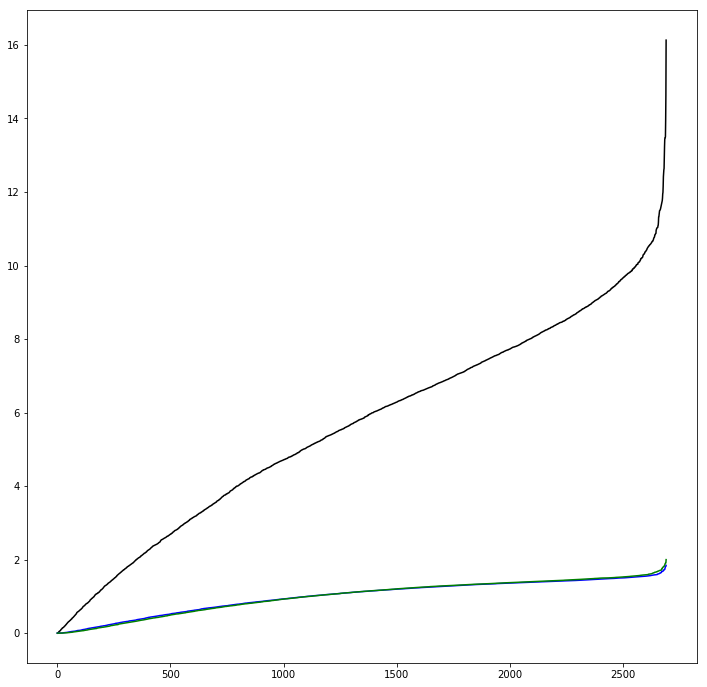

In [20]:
# sort 'em and plot 'em

evals.sort()
evals2.sort()
evals3.sort()



plt.figure(figsize=(12,12))
plt.plot(range(len(evals)),evals,color='k') # whole state
plt.plot(range(len(evals2)),evals2,color='b') # 2016 districting
if state_no == '37': plt.plot(range(len(evals3)),evals3,color='g') #nc12 if valid


In [25]:
# how you might write some eigenvalues to a file
with open("eigenvalues.txt",'w') as f:
    f.write(' '.join([x for x in evals]))


TypeError: sequence item 0: expected str instance, numpy.float64 found

1.8441923117265144

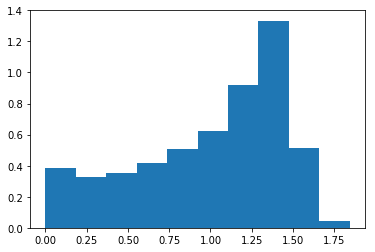

In [6]:
# how you might plot a histogram of some eigenvalues
plt.hist(evals2,density=True)


[]
[-1.0061396160665481e-16, -1.7976072019809664e-16]


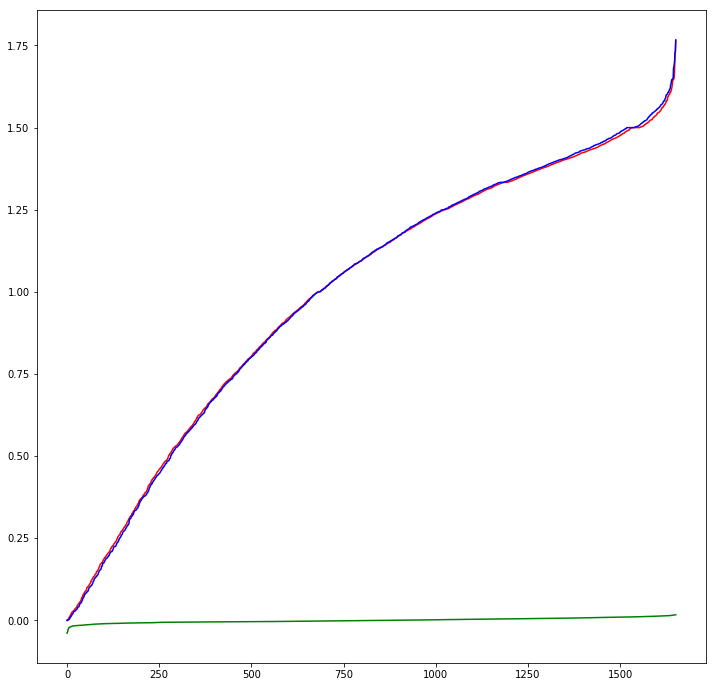

In [7]:
# here's a similar exercise for the normalized laplacian

state_no = '31'

adj = scipy.sparse.load_npz('adj_mats/'+state_no + '_full.npz').todense().astype(int)
G = nx.from_numpy_matrix(adj)
lap = networkx.normalized_laplacian_matrix(G).todense()
evals = np.real(scipy.linalg.eigvals(lap).tolist())
print([x for x in evals if x<0])
#evals2.sort()


adj2 = scipy.sparse.load_npz('adj_mats/'+state_no + '_blocks.npz').todense().astype(int)
G2 = nx.from_numpy_matrix(adj2)
lap2 = networkx.normalized_laplacian_matrix(G2).todense()
evals2 = np.real(scipy.linalg.eigvals(lap2).tolist())
print([x for x in evals2 if x<0])
#evals2.sort()


evals.sort()
evals2.sort()
plt.figure(figsize=(12,12))
plt.plot(range(len(evals)),evals,color='k') #whole state
plt.plot(range(len(evals2)),evals2,color='b') #current plan

diff = [abs(x-y) for x,y in zip(evals,evals2)]
diff.sort()
plt.plot(range(len(evals)),diff,color='y') #elementwise l1 distance


1.7663092077132077

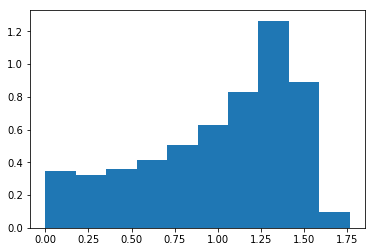

In [8]:
# here's a histogram for normalized laplacian eigenvalues
plt.hist(evals2,density=True)
